In [1]:
pre_folder  = "/Users/Gonzalo/github/CCdata/Seattle/pre/"
post_folder = "/Users/Gonzalo/github/CCdata/Seattle/post/"

In [2]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_ccd_file
from CCfun import select_crystal_filenames
from CCfun import load_as_df
from CCfun import load_ambients
from CCfun import read_experiment_metadata

from CCplot import plot1d
from CCplot import plot2d
from CCplot import temporary
from CCplot import auto_plot_style

In [3]:
%matplotlib inline

auto_plot_style()

In [4]:
pre  = dict()
post = dict()

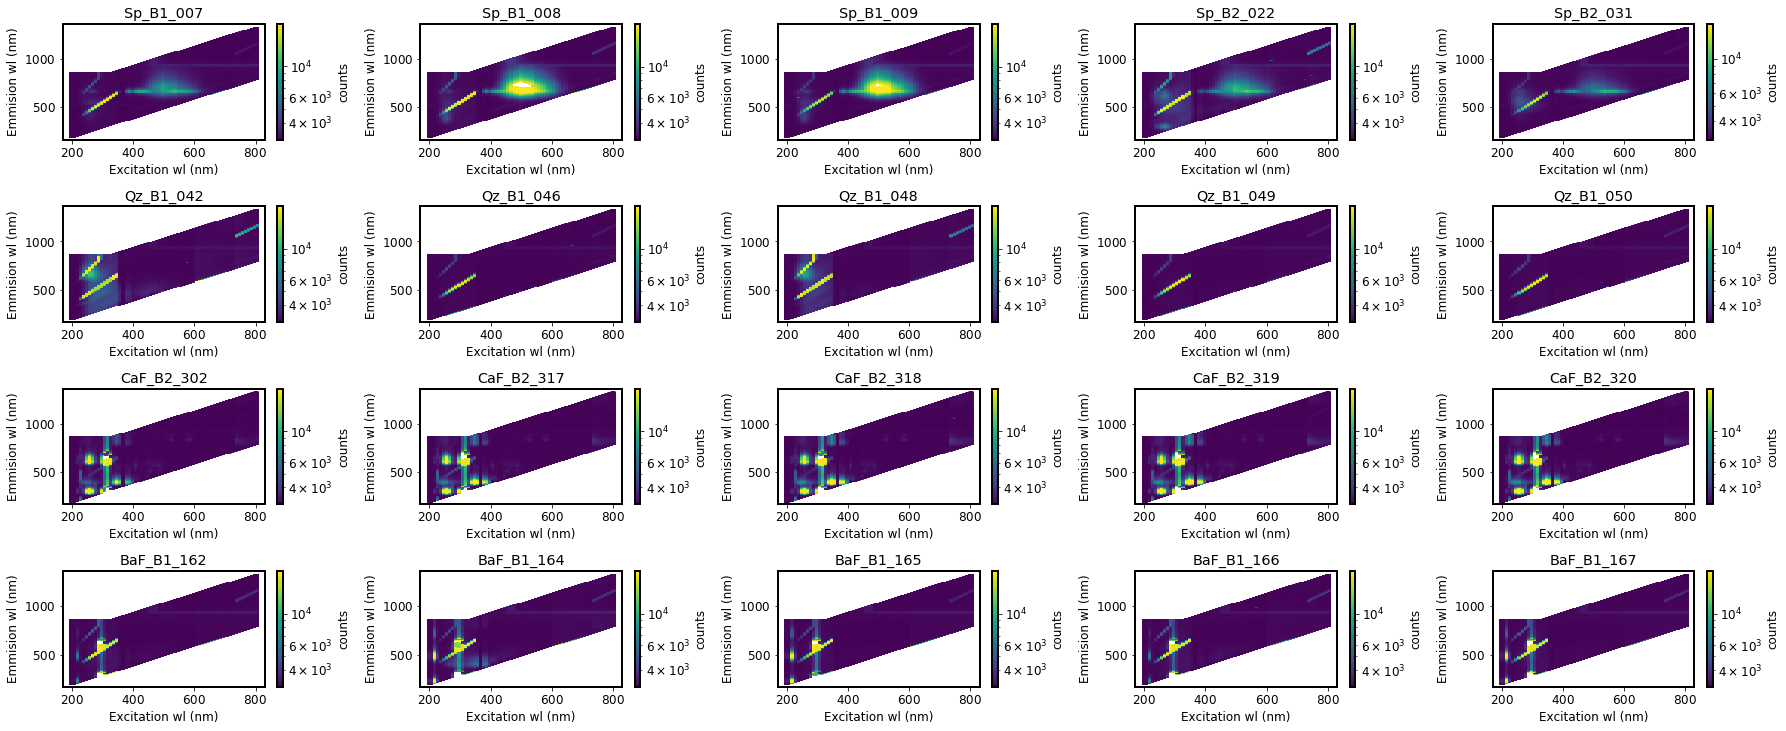

In [5]:
plt.figure(figsize=(25, 25))

k = 1
for name, exposure in zip("Sp Qz CaF BaF".split(),
                          (10, 10, 1, 10)        ):
    folder = glob.glob(os.path.join(pre_folder, f"*_{name}_*"))[0]
    meta   = read_experiment_metadata(folder)

    for crystal, crystal_id in meta["crystal_mapping"].items():
        if int(crystal) < 7: continue
        if crystal_id not in pre:
            filenames       = select_crystal_filenames(folder, crystal)
            pre[crystal_id] = load_as_df(filenames)
        
        dataframe = pre[crystal_id]
        dataframe = dataframe[dataframe.exp_index  ==        0]
        dataframe = dataframe[dataframe.grating    ==        2]
        dataframe = dataframe[dataframe.slit_width ==     1000]
        dataframe = dataframe[dataframe.looparound ==    False]
        dataframe = dataframe[dataframe.exposure   == exposure]

        plt.subplot(10, 5, k)
        plot2d(dataframe.ex_wl .values,
               dataframe.em_wl .values,
               dataframe.counts.values,
               title=crystal_id, log=True, cmin=3e3, cmax=2e4)
        k += 1
plt.tight_layout()

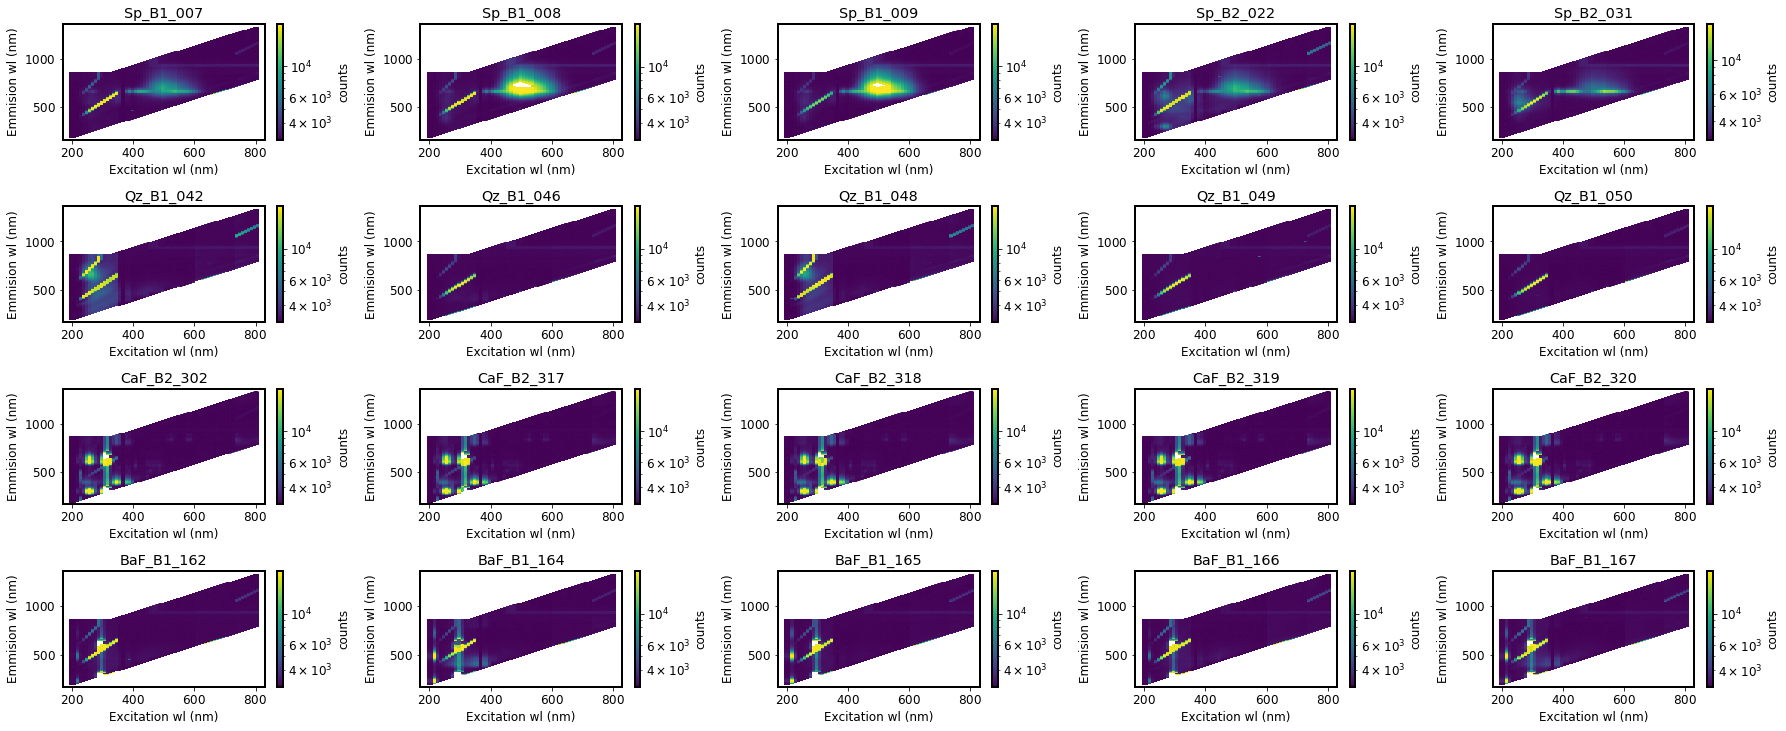

In [6]:
plt.figure(figsize=(25, 25))

k = 1
for name, exposure in zip("Sp Qz CaF BaF".split(),
                          (10, 10, 1, 10)        ):
    folder = glob.glob(os.path.join(post_folder, f"*_{name}_*"))[0]
    meta   = read_experiment_metadata(folder)

    for crystal, crystal_id in meta["crystal_mapping"].items():
        if int(crystal) < 7: continue
        if crystal_id not in post:
            filenames        = select_crystal_filenames(folder, crystal)
            post[crystal_id] = load_as_df(filenames)
        
        dataframe = post[crystal_id]
        dataframe = dataframe[dataframe.exp_index  ==        0]
        dataframe = dataframe[dataframe.grating    ==        2]
        dataframe = dataframe[dataframe.slit_width ==     1000]
        dataframe = dataframe[dataframe.looparound ==    False]
        dataframe = dataframe[dataframe.exposure   == exposure]

        plt.subplot(10, 5, k)
        plot2d(dataframe.ex_wl .values,
               dataframe.em_wl .values,
               dataframe.counts.values,
               title=crystal_id, log=True, cmin=3e3, cmax=2e4)
        k += 1
plt.tight_layout()

In [21]:
from CCfun import select_ambient_filenames
from CCfun import metadata_from_filename
from CCfun import AMBIENT_PATTERN

import collections

def load_ambients(folder):
    filenames = select_ambient_filenames(folder)
    spectra   = collections.defaultdict(lambda: collections.defaultdict(dict))

    for filename in filenames:
        meta     = metadata_from_filename(filename, pattern=AMBIENT_PATTERN)
        spectrum = load_ccd_file(filename)
        spectra[meta.crystal][meta.exposure][meta.when] = spectrum

    combined = dict()
    for crystal_no, crystal in spectra.items():
        combined.setdefault(crystal_no, dict())
        for exposure, ambients in crystal.items():
            combined[crystal_no][exposure] = ambients["before"]#combine_spectra(*tuple(ambients.values()))
    return combined


In [22]:
backgrounds_pre  = load_ambients(os.path.join( pre_folder, "Seattle_Sp_pre_2019_04_27_00_42_43_197000"))
backgrounds_post = load_ambients(os.path.join(post_folder, "Seattle_Sp_post_2019_05_09_15_35_57_995000"))

# Sapphire

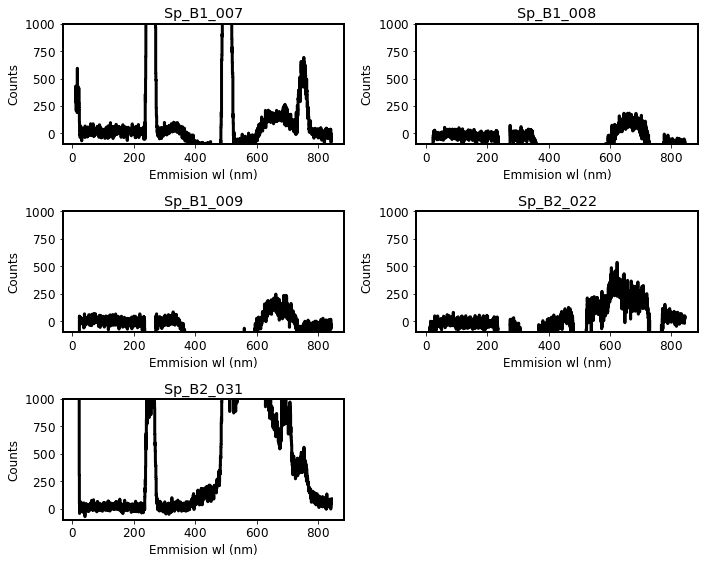

In [30]:
for k, crystal_id in enumerate(filter(lambda x: "Sp" in x, post), start=1):
    predf = pre  [crystal_id]
    predf = predf[predf.exp_index  ==     0]
    predf = predf[predf.exposure   ==    10]
    predf = predf[predf.grating    ==     2]
    predf = predf[predf.ex_wl      ==   250]
    predf = predf[predf.slit_width ==  1000]
    predf = predf[predf.looparound == False]
#    print(predf)
    prewf = predf.counts - backgrounds_pre[k+6][10].raw

    postdf = post  [crystal_id]
    postdf = postdf[postdf.exp_index  ==     0]
    postdf = postdf[postdf.exposure   ==    10]
    postdf = postdf[postdf.grating    ==     2]
    postdf = postdf[postdf.ex_wl      ==   250]
    postdf = postdf[postdf.slit_width ==  1000]
    postdf = postdf[postdf.looparound == False]
    postwf = postdf.counts - backgrounds_post[k+6][10].raw
    
    diff = postwf - prewf

    plt.subplot(3, 2, k)
    plot1d(predf.em_wl, diff, crystal_id)
    plt.ylim(-100, 1e3)
plt.tight_layout()

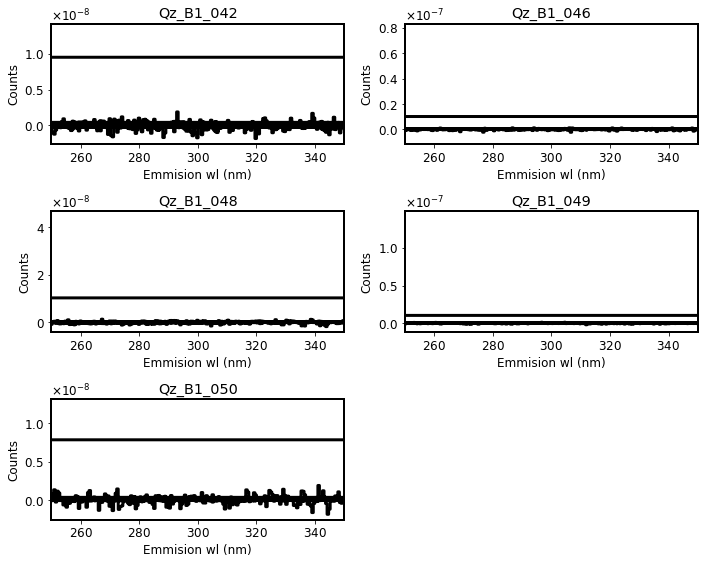

In [19]:
for k, crystal_id in enumerate(filter(lambda x: "Qz" in x, post), start=1):
    predf = pre  [crystal_id]
    predf = predf[predf.exp_index  ==     0]
    predf = predf[predf.exposure   ==    10]
    predf = predf[predf.grating    ==     2]
    predf = predf[predf.slit_width ==  1000]
    predf = predf[predf.looparound == False]

    postdf = post  [crystal_id]
    postdf = postdf[postdf.exp_index  ==     0]
    postdf = postdf[postdf.exposure   ==    10]
    postdf = postdf[postdf.grating    ==     2]
    postdf = postdf[postdf.slit_width ==  1000]
    postdf = postdf[postdf.looparound == False]

    diff = postdf.dquanta - predf.dquanta
    plt.subplot(3, 2, k)
    plot1d(predf.em_wl, diff, crystal_id)
    plt.xlim(250, 350)
plt.tight_layout()

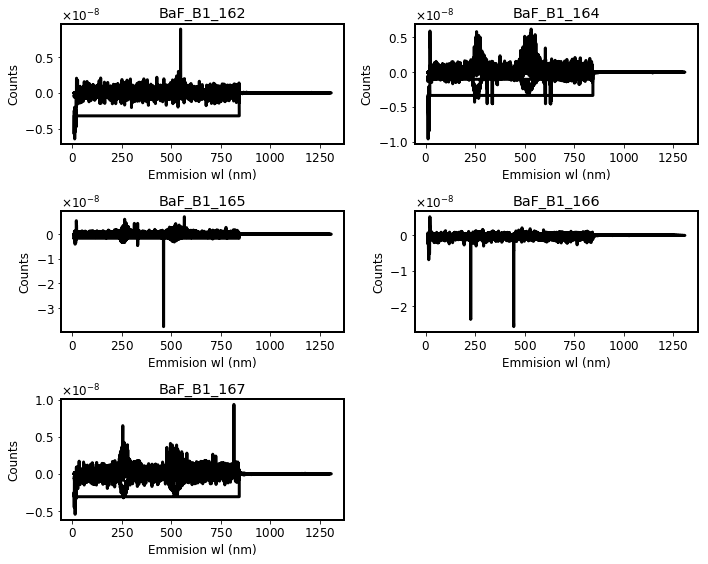

In [21]:
for k, crystal_id in enumerate(filter(lambda x: "BaF" in x, post), start=1):
    predf = pre  [crystal_id]
    predf = predf[predf.exp_index  ==     0]
    predf = predf[predf.exposure   ==    10]
    predf = predf[predf.grating    ==     2]
    predf = predf[predf.slit_width ==  1000]
    predf = predf[predf.looparound == False]

    postdf = post  [crystal_id]
    postdf = postdf[postdf.exp_index  ==     0]
    postdf = postdf[postdf.exposure   ==    10]
    postdf = postdf[postdf.grating    ==     2]
    postdf = postdf[postdf.slit_width ==  1000]
    postdf = postdf[postdf.looparound == False]

    diff = postdf.dquanta - predf.dquanta
    plt.subplot(3, 2, k)
    plot1d(predf.em_wl, diff, crystal_id)

plt.tight_layout()

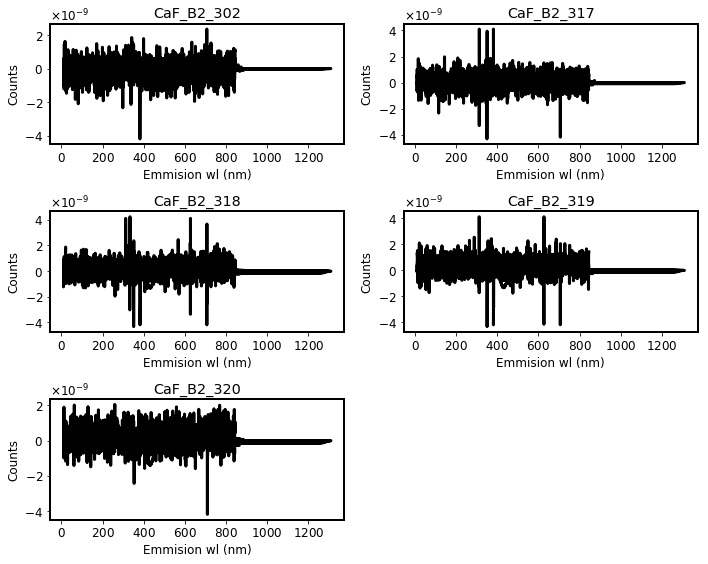

In [20]:
for k, crystal_id in enumerate(filter(lambda x: "CaF" in x, post), start=1):
    predf = pre  [crystal_id]
    predf = predf[predf.exp_index  ==     0]
    predf = predf[predf.exposure   ==     1]
    predf = predf[predf.grating    ==     2]
    predf = predf[predf.slit_width ==  1000]
    predf = predf[predf.looparound == False]

    postdf = post  [crystal_id]
    postdf = postdf[postdf.exp_index  ==     0]
    postdf = postdf[postdf.exposure   ==     1]
    postdf = postdf[postdf.grating    ==     2]
    postdf = postdf[postdf.slit_width ==  1000]
    postdf = postdf[postdf.looparound == False]

    diff = postdf.dquanta - predf.dquanta
    plt.subplot(3, 2, k)
    plot1d(predf.em_wl, diff, crystal_id)

plt.tight_layout()